# Neustar exposure process
* Neustar exposure data is household level by timestamp, campaign, placement and creative, and device type level data 
* Data are usaually pulled weekly 
* For demostration purpose, below is first 5 rows of campaign data for Eyeview Meijer between 2018/04/27 an 2018/05/03

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image

path =r'S:\NBI_Sales_Effect\Eyeview Meijer 2018Q3\Neustar\Data_Exposure'
out_path = r'S:\NBI_Sales_Effect\Eyeview Meijer 2018Q3\Neustar\Output'
df = pd.read_csv(path+'\\EyeviewMeijer_2018-04-27_2018-05-03.csv',delimiter='|', error_bad_lines=False, chunksize=5)
print(next(df))

  exposure_date                          panellist_id  \
0    2018-05-03  fff86433-253d-4cca-9727-59b1dc3ce30a   
1    2018-05-03  fff74b23-a916-448e-aa2c-a061478c64f9   
2    2018-05-03  fff544a2-4997-4fc0-b289-6d9eff403a19   
3    2018-05-03  fff3ba0c-f089-4f36-82e3-92197b20cea9   
4    2018-05-03  fff3ba0c-f089-4f36-82e3-92197b20cea9   

                              cookie_id  time_stamp      cid  contentgroup  \
0  fff86433-253d-4cca-9727-59b1dc3ce30a  1525372872  ncs2016             0   
1  fff74b23-a916-448e-aa2c-a061478c64f9  1525390811  ncs2016             0   
2  fff544a2-4997-4fc0-b289-6d9eff403a19  1525386340  ncs2016             0   
3  fff3ba0c-f089-4f36-82e3-92197b20cea9  1525351267  ncs2016             0   
4  fff3ba0c-f089-4f36-82e3-92197b20cea9  1525351258  ncs2016             0   

            campaign  placement  creative creative_execution  \
0  EyeviewMeijer2018      20323  standard            eyeview   
1  EyeviewMeijer2018      20315  standard            eyeview

In [2]:
########## EXPOSURE ##########
# Read in Exposure Files 
filenames=os.listdir(path)
list_= []
total = 0
filen = 0

for file in filenames:
    df = pd.read_csv(path+'\\'+file,delimiter='|', error_bad_lines=False, parse_dates=['exposure_date'])
    df = df.loc[(df.cid == 'ncs2016') & (df.campaign == 'EyeviewMeijer2018')]
    df=df.drop(['si_domain','si_path','rp_domain','rp_path','viewability_status','am_param','vendor_id'],axis=1)
    cnt = len(df)
    total = total + cnt
    filen = filen + 1
    print(file, " --- ", cnt)
    list_.append(df)

print ("Total --- ", total, "Number of Files --- ", filen)
exp = pd.concat(list_)

EyeviewMeijer_2018-04-27_2018-05-03.csv  ---  307046
EyeviewMeijer_2018-05-04_2018-05-10.csv  ---  494394
EyeviewMeijer_2018-05-11_2018-05-17.csv  ---  608835
EyeviewMeijer_2018-05-18_2018-05-24.csv  ---  561966
EyeviewMeijer_2018-05-25_2018-05-31.csv  ---  562602
EyeviewMeijer_2018-06-01_2018-06-07.csv  ---  435855
EyeviewMeijer_2018-06-08_2018-06-14.csv  ---  347451
us-nbi_2018-06-15_2018-06-21_356464_part2_5656643.csv.gz  ---  352308
us-nbi_2018-06-22_2018-06-28_356464_part2_9820828.csv.gz  ---  82546
Total ---  3753003 Number of Files ---  9


* Take a look at the data

In [3]:
exp[:5]

exposure_date                          panellist_id  \
0    2018-05-03  fff86433-253d-4cca-9727-59b1dc3ce30a   
1    2018-05-03  fff74b23-a916-448e-aa2c-a061478c64f9   
2    2018-05-03  fff544a2-4997-4fc0-b289-6d9eff403a19   
3    2018-05-03  fff3ba0c-f089-4f36-82e3-92197b20cea9   
4    2018-05-03  fff3ba0c-f089-4f36-82e3-92197b20cea9   

                              cookie_id  time_stamp      cid  contentgroup  \
0  fff86433-253d-4cca-9727-59b1dc3ce30a  1525372872  ncs2016             0   
1  fff74b23-a916-448e-aa2c-a061478c64f9  1525390811  ncs2016             0   
2  fff544a2-4997-4fc0-b289-6d9eff403a19  1525386340  ncs2016             0   
3  fff3ba0c-f089-4f36-82e3-92197b20cea9  1525351267  ncs2016             0   
4  fff3ba0c-f089-4f36-82e3-92197b20cea9  1525351258  ncs2016             0   

            campaign  placement  creative creative_execution device_type  
0  EyeviewMeijer2018      20323  standard            eyeview    Computer  
1  EyeviewMeijer2018      20315  standard            eyeview    Computer  
2  EyeviewMeijer2018      20323  standard            eyeview    Computer  
3  EyeviewMeijer2018      20323  standard            eyeview    Computer  
4  EyeviewMeijer2018      20323  standard            eyeview    Computer

In [4]:
# Rename the columns    
exp.columns = ['Date','PanelistID','Visitor','Timestamp','CI','CG','Campaign','Placement','Creative','Creative_execute','Device_Type']

#Subset to campaign period 
exp = exp[(exp['Date'] >= '2018-04-29') & (exp['Date'] <= '2018-06-23')]

In [5]:
exp[:5]

Date                            PanelistID  \
0 2018-05-03  fff86433-253d-4cca-9727-59b1dc3ce30a   
1 2018-05-03  fff74b23-a916-448e-aa2c-a061478c64f9   
2 2018-05-03  fff544a2-4997-4fc0-b289-6d9eff403a19   
3 2018-05-03  fff3ba0c-f089-4f36-82e3-92197b20cea9   
4 2018-05-03  fff3ba0c-f089-4f36-82e3-92197b20cea9   

                                Visitor   Timestamp       CI  CG  \
0  fff86433-253d-4cca-9727-59b1dc3ce30a  1525372872  ncs2016   0   
1  fff74b23-a916-448e-aa2c-a061478c64f9  1525390811  ncs2016   0   
2  fff544a2-4997-4fc0-b289-6d9eff403a19  1525386340  ncs2016   0   
3  fff3ba0c-f089-4f36-82e3-92197b20cea9  1525351267  ncs2016   0   
4  fff3ba0c-f089-4f36-82e3-92197b20cea9  1525351258  ncs2016   0   

            Campaign  Placement  Creative Creative_execute Device_Type  
0  EyeviewMeijer2018      20323  standard          eyeview    Computer  
1  EyeviewMeijer2018      20315  standard          eyeview    Computer  
2  EyeviewMeijer2018      20323  standard          eyeview    Computer  
3  EyeviewMeijer2018      20323  standard          eyeview    Computer  
4  EyeviewMeijer2018      20323  standard          eyeview    Computer

* QA: Check we have similar amount of impression for each day. If one day has 5M impression while the next day has only 5K impression or 0 impression, we should let PM and MAC know.

In [6]:
imp = exp.groupby('Date')['Timestamp'].nunique().reset_index('Date')
imp.to_csv(out_path+'\\dates.csv')

In [7]:
#save intermidiate file
exp.to_pickle(out_path+'\\em_exp') 

* In this example, we need to several exposure breaks : 15s , 30s, and by holiday period, and we will use a mapping file (from MAC) to match the "Placement" in Neustar exposure with the "ID" in the mapping file
* Not all projects require these detailed exposure breaks, if you don't need a mapping file, please skip this step 

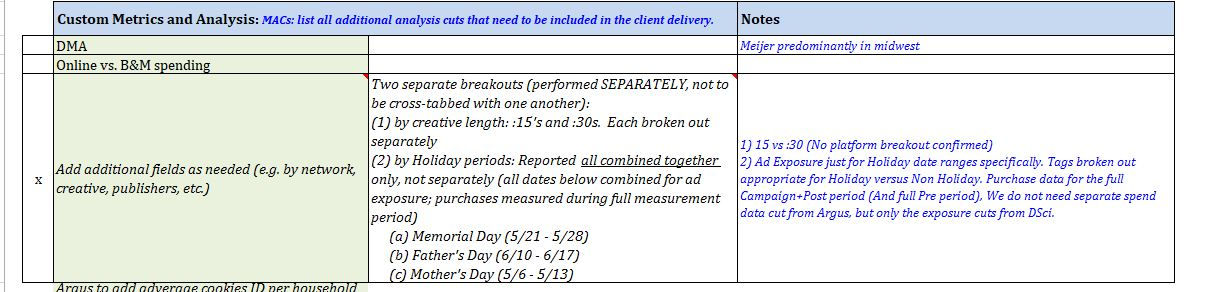

In [8]:
Image(filename='playbook_img/PRF.JPG')

In [9]:
########## Read in Mapping File ##########
from pandas import ExcelWriter
from pandas import ExcelFile
 
mapping = pd.read_excel(r'S:\NBI_Sales_Effect\Eyeview Meijer 2018Q3\EyeviewMeijer2018_Placement Names and Ids.xlsx',sheetname='Placement Names | Ids')
mapping[:5]

C:\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Tag Creative (cr)  Tag Placement (pc)  \
0          standard               20312   
1          standard               20313   
2          standard               20314   
3          standard               20315   
4          standard               20316   

                     Eyeview Placement Name  
0  Standard_Desktop_15_Competitive Shoppers  
1                    Standard_Desktop_15_KB  
2                Standard_Desktop_15_Models  
3                    Standard_Desktop_15_RT  
4                   Standard_Desktop_15_CRM

In [10]:
mapping.columns = ['creative_holiday','Placementid','placement_name']
mapping['creative_length'] = np.where(mapping['placement_name'].str.contains("15"), '15', '30')
mapping[:5]

creative_holiday  Placementid                            placement_name  \
0         standard        20312  Standard_Desktop_15_Competitive Shoppers   
1         standard        20313                    Standard_Desktop_15_KB   
2         standard        20314                Standard_Desktop_15_Models   
3         standard        20315                    Standard_Desktop_15_RT   
4         standard        20316                   Standard_Desktop_15_CRM   

  creative_length  
0              15  
1              15  
2              15  
3              15  
4              15

* check if all placement in the exposure has a match in the mapping file. If not, we should inform MAC and PM

In [11]:
plc_ids = exp[['Placement']].drop_duplicates()
check_pc = pd.merge(plc_ids,mapping, how='left', left_on='Placement', right_on=['Placementid'])
check_pc.loc[check_pc['placement_name'].isnull()]

Empty DataFrame
Columns: [Placement, creative_holiday, Placementid, placement_name, creative_length]
Index: []

In [12]:
#drop duplications and uncessary columns(if any)
mapping=mapping[['Placementid','creative_holiday','creative_length']].drop_duplicates(['Placementid','creative_holiday','creative_length'])

In [13]:
exp.rename(columns={'Placement': 'Placementid'}, inplace=True)
#Merge mapping with Exposures
exp_mapping = pd.merge(exp, mapping, on='Placementid', how='left')
# Aggregate Total Exposure by Timestamps
exp_total = exp_mapping.groupby(['PanelistID', 'Placementid','creative'])['Timestamp'].nunique().reset_index(name='Total_Exp')
exp_total = exp_total.set_index('PanelistID')
print (exp_total.shape)
print (exp_total[:5])

(699792, 1)
                                          Total_Exp
PanelistID                                         
00000f4dd16d872d44076cca5742b9bf4464c522          6
0000113f61e6de4c6bc3016edb8fe090714b7f7b          5
0000117fb0babda10271ac4ad48cdde9f70148a0         24
000018225f12eb5cf61ce6647cf0975eb07386ae          4
00001ed980c9a9a754abecc85c407b6bcb9c95b1          3


In [14]:
# this is the funcion for creating exposure breaks
def agg_exp_breaks(df_in, byvar):
    #count unique Timestamp by Panlelist
    df_groupby = df_in.groupby(['PanelistID', byvar])['Timestamp'].nunique().reset_index(name='expnum')
    
    #long to wide format
    df_groupby_trans = df_groupby.pivot_table(index='PanelistID', columns=byvar, aggfunc=sum ,fill_value=0)
    df_groupby_trans.columns = df_groupby_trans.columns.droplevel(0)
    
    #add "_exp" at the end of each column
    df_groupby_trans.columns=[column+'_exp' for column in df_groupby_trans.columns]
    #df_groupby_trans = df_groupby_trans.reset_index(level='PanelistID')
    
    return(df_groupby_trans)

In [15]:
# exposure break by holidays
creative_holiday = agg_exp_breaks(exp_mapping,'creative_holiday')
print (creative_holiday[:5])
print (len(creative_holiday))

                                          holiday_exp  standard_exp
PanelistID                                                         
00000f4dd16d872d44076cca5742b9bf4464c522            4             2
0000113f61e6de4c6bc3016edb8fe090714b7f7b            3             2
0000117fb0babda10271ac4ad48cdde9f70148a0           15             9
000018225f12eb5cf61ce6647cf0975eb07386ae            2             2
00001ed980c9a9a754abecc85c407b6bcb9c95b1            3             0
699792


In [16]:
creative_length = agg_exp_breaks(exp_mapping,'creative_length')
print (creative_length[:5])
print (len(creative_length))

                                          15_exp  30_exp
PanelistID                                              
00000f4dd16d872d44076cca5742b9bf4464c522       6       0
0000113f61e6de4c6bc3016edb8fe090714b7f7b       0       5
0000117fb0babda10271ac4ad48cdde9f70148a0      11      15
000018225f12eb5cf61ce6647cf0975eb07386ae       1       3
00001ed980c9a9a754abecc85c407b6bcb9c95b1       0       3
699792


In [18]:
# Merge DataFrames
exposure_total = pd.concat([exp_total,creative_length,creative_holiday],axis=1)
exposure_total = exposure_total.reset_index(level='PanelistID')
print (len(exposure_total))
exposure_total[:5]

699792


PanelistID  Total_Exp  15_exp  30_exp  \
0  00000f4dd16d872d44076cca5742b9bf4464c522          6       6       0   
1  0000113f61e6de4c6bc3016edb8fe090714b7f7b          5       0       5   
2  0000117fb0babda10271ac4ad48cdde9f70148a0         24      11      15   
3  000018225f12eb5cf61ce6647cf0975eb07386ae          4       1       3   
4  00001ed980c9a9a754abecc85c407b6bcb9c95b1          3       0       3   

   holiday_exp  standard_exp  
0            4             2  
1            3             2  
2           15             9  
3            2             2  
4            3             0

In [ ]:
#save intermidiate file
exposure_total.to_pickle(out_path+'\\em_exp2') 
#exposure_total= pd.read_pickle('em_exp2')

* The next step is merge exposure_total with activity files 
* Dowload weekly activity files within the campaign period from S3 (useast1-nlsn-mdl-w-reaction-nbise-dev/auto/activity/browser)

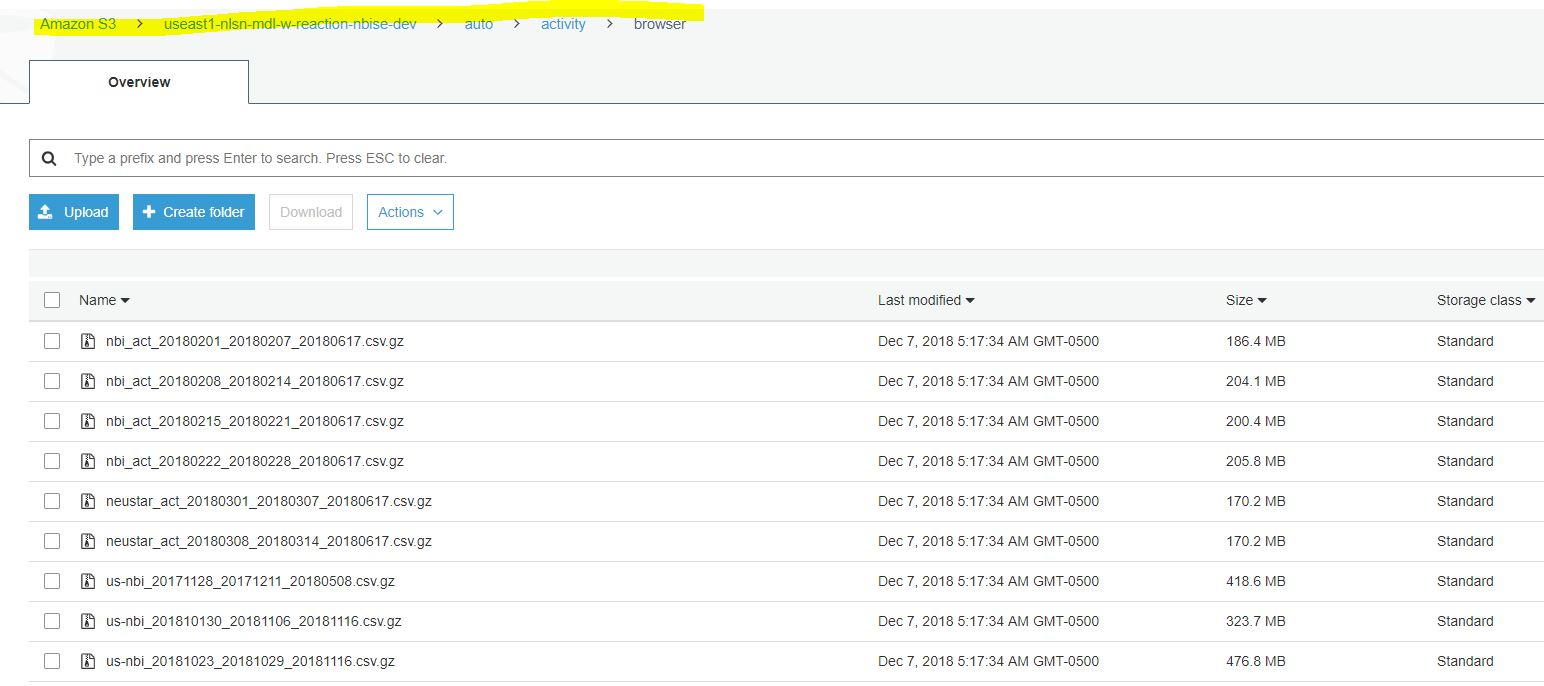

In [19]:
Image(filename='playbook_img/Neustar activity file.JPG')

* This is a small subset of activity file for demonstration

In [20]:
# Read in Activity Files & Group by PanelistID
act_path =r'S:\NBI_Sales_Effect\Eyeview Meijer 2018Q3\Neustar\Data_Activity'

act_demo=pd.read_csv(act_path+'\\us_nbi_act_20180515_20180521_20180628.csv.gz',
                     delimiter=',',error_bad_lines=False, chunksize=10)
print(next(act_demo))

         date                              contentgroup  count
0  2018-05-15  0018de7cd1b7a2aaf09e969557d8892d9239dc25      1
1  2018-05-15  00821baa7a6e3d30773a56050c52edb8080410ac      1
2  2018-05-15  008edc27bf63c10c2c981b406c2cea74d999cbf5      1
3  2018-05-15  00d0d6aba56572a3f787f6a10ef789c6f4630633      1
4  2018-05-15  012f87eeff0a24abddc509e1b1aad82cb6ae580c      1
5  2018-05-15  0148c60d908655d7a9b62a43137037ae09d462d4      1
6  2018-05-15  016f2c0f449f07bc476e9b5f4d4b97fe69092cd1      1
7  2018-05-15  01bc8c2563439d3ad0f3370d66991beaefb33fef      1
8  2018-05-15  01ef10d1142b785c9fc76729ee5b288ad6d70dcb      1
9  2018-05-15  01efa2f0e8e6d042560fea35834459652b80c9a3      1


In [21]:
# Read in Activity Files & Group by PanelistID
act_path =r'S:\NBI_Sales_Effect\Eyeview Meijer 2018Q3\Neustar\Data_Activity'

filenames=os.listdir(act_path)
activity = pd.DataFrame()
act_= []

for file in filenames:
    df = pd.read_csv(act_path+'\\'+file,delimiter=',',error_bad_lines=False, parse_dates=['date'])
    df.columns = ['Date', 'PanelistID', 'Count']
    #subset by campaign period
    df=df[(df['Date']>='2018-04-29') & (df['Date'] < '2018-06-23')]
    print(file, " --- ", len(df))
    #drop duplicated panelistid
    df2=df[['PanelistID']].drop_duplicates()
    print(file, " drop dupulication--- ", len(df2))
    act_.append(df2)
activity = pd.concat(act_)
activity=activity.drop_duplicates(['PanelistID']) 

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


us_nbi_act_20180515_20180521_20180628.csv.gz  ---  6487159
us_nbi_act_20180515_20180521_20180628.csv.gz  drop dupulication---  4533106
us_nbi_act_20180423_20180430_20180626.csv.gz  ---  1852778
us_nbi_act_20180423_20180430_20180626.csv.gz  drop dupulication---  1671852
us_nbi_act_20180522_20180528_20180626.csv.gz  ---  6097377
us_nbi_act_20180522_20180528_20180626.csv.gz  drop dupulication---  4346228
us_nbi_act_20180508_20180514_20180628.csv.gz  ---  5906432
us_nbi_act_20180508_20180514_20180628.csv.gz  drop dupulication---  4192467
us_nbi_act_20180501_20180507_20180628.csv.gz  ---  6470970
us_nbi_act_20180501_20180507_20180628.csv.gz  drop dupulication---  4452337
us_nbi_act_20180619_20180625_20180716.csv.gz  ---  3759474
us_nbi_act_20180619_20180625_20180716.csv.gz  drop dupulication---  3020191
us_nbi_act_20180612_20180618_20180716.csv.gz  ---  5111609
us_nbi_act_20180612_20180618_20180716.csv.gz  drop dupulication---  3766642
us_nbi_act_20180605_20180611_20180716.csv.gz  ---  6448

* Subset activity to 2* size of exposure file

In [22]:
frac = len(exposure_total)*2/len(activity)
print(activity.shape)
activity_subset = activity.sample(frac=frac)
print(activity_subset.shape)

(18908199, 1)
(1399584, 1)


In [ ]:
#save intermidate file
activity_subset.to_pickle(act_path+'//activity_subset') 
#activity_subset= pd.read_pickle('activity_subset')

In [23]:
#merge exposure with actitivy
expfinal = pd.merge(exposure_total, activity_subset, how='outer', on = 'PanelistID').fillna(0)

#convert float to int 
for col in expfinal.columns:
    if col !='PanelistID':
        expfinal[col]=expfinal[col].astype('int')
print(expfinal[:5])

                                 PanelistID  Total_Exp  15_exp  30_exp  \
0  00000f4dd16d872d44076cca5742b9bf4464c522          6       6       0   
1  0000113f61e6de4c6bc3016edb8fe090714b7f7b          5       0       5   
2  0000117fb0babda10271ac4ad48cdde9f70148a0         24      11      15   
3  000018225f12eb5cf61ce6647cf0975eb07386ae          4       1       3   
4  00001ed980c9a9a754abecc85c407b6bcb9c95b1          3       0       3   

   holiday_exp  standard_exp  
0            4             2  
1            3             2  
2           15             9  
3            2             2  
4            3             0  


In [24]:

# QA: these 2 lists should be exactly the same 
print ([sum(expfinal[col]>0) for col in expfinal.columns if col != 'PanelistID'])
print ([sum(exposure_total[col]>0) for col in exposure_total.columns if col != 'PanelistID'])

[699792, 489323, 564403, 400510, 574560]
[699792, 489323, 564403, 400510, 574560]


In [ ]:
expfinal.to_pickle(out_path+'//eyeview_digital_exp')
expfinal.to_csv(out_path+'//eyeview_digital_exp.csv') #output .csv files 